# Ethereum Price Prediction Model

First attempt at writing my own model. Just playing around with regression models. 


Data can be source from Yahoo at this link: https://au.finance.yahoo.com/quote/ETH-AUD/history?period1=1541376000&period2=1604534400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true, between the periods of 05/11/2018 to 05/11/2020.

### Setup up env and look at data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
price_data = pd.read_csv("./data/ETH-AUD.csv")
price_data = pd.DataFrame(price_data)

price_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-05,287.690674,292.681061,286.926178,289.896301,289.896301,2237067074
1,2018-11-06,290.414764,301.752777,288.506134,301.752777,301.752777,2565033931
2,2018-11-07,302.298859,305.076721,297.742645,298.594055,298.594055,2650477075
3,2018-11-08,298.729004,300.053406,292.179779,292.125153,292.125153,2435048396
4,2018-11-09,291.779114,294.404663,289.887054,290.558807,290.558807,2150415148


In [3]:
price_data.isna().sum()
price_data.isna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
727,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False
730,False,False,False,False,False,False,False


In [4]:
print(price_data.shape)
print(price_data.dtypes)
print(price_data.info());

(732, 7)
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       732 non-null    object 
 1   Open       732 non-null    float64
 2   High       732 non-null    float64
 3   Low        732 non-null    float64
 4   Close      732 non-null    float64
 5   Adj Close  732 non-null    float64
 6   Volume     732 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 40.2+ KB
None


Pick a Ridge model and trim our data so it is predicting close price based off the data it has (will probably just return something akin to average).

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# We're dropping data data right now because it isn't useful to us with this model
# Dropping volume data because its value range is currently too large for the estimator
price_data_dateless = price_data.drop(["Date", "Volume"], axis=1)

np.random.seed(42)
# We want to predict Adj Close Prices
X = price_data_dateless.drop(["Adj Close"], axis=1)
y = price_data_dateless["Adj Close"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

clf = Ridge()
clf.fit(X_train, y_train);

print(clf.score(X_test, y_test))
y_preds = clf.predict(X_test)
y_preds[:5]


(585, 4) (585,) (147, 4) (147,)
0.999999999986216


array([334.35082661, 127.8572826 , 255.15588401, 302.46369243,
       484.05120015])

The values need to be normalised so they work better

In [64]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)
meae = median_absolute_error(y_test, y_preds)

mae, mse, meae

(0.00025982821429876784, 1.6034346225625426e-07, 0.00016698628402878057)

In [75]:
print(y_test.std())
print(y_preds.std())
print()

y_preds_df = pd.DataFrame(y_preds, y_test)
print(y_preds_df)

108.22338703024627
107.85464491246638

                     0
Adj Close             
334.350861  334.350827
127.857399  127.857283
255.155960  255.155884
302.463776  302.463692
484.051575  484.051200
...                ...
179.280594  179.280548
383.078552  383.079289
252.194427  252.194266
242.711334  242.711088
197.245087  197.244930

[147 rows x 1 columns]


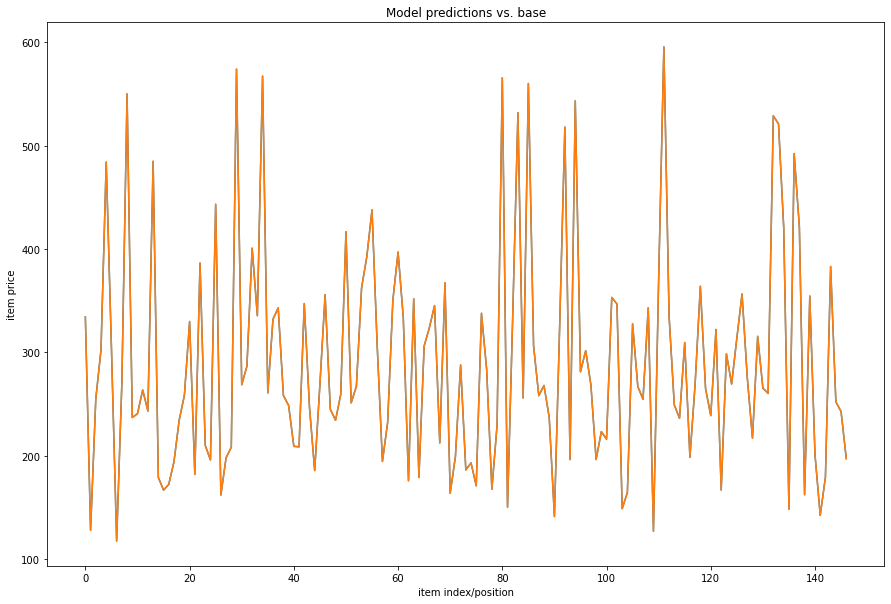

In [71]:
fig, ax = plt.subplots(figsize=(15,10)) # (width, height)
ax.plot(range(0,147), y_preds)
ax.plot(range(0,147), y_test)
ax.set(title="Model predictions vs. base", 
       xlabel="item index/position",
       ylabel="item price")

plt.show()

In [77]:
X_test

,Open,High,Low,Close
604,327.755402,336.564423,325.653198,334.350861
33,129.592194,134.655731,120.457329,127.857399
300,255.955353,257.793396,251.611023,255.155960
457,281.224274,306.275482,279.541595,302.463776
634,464.511108,488.333405,456.973724,484.051575
...,...,...,...,...
70,162.410858,181.628510,162.394836,179.280594
192,356.519714,398.849640,355.662323,383.078552
328,258.190277,259.156250,247.008957,252.194427
165,243.195984,243.089233,238.697006,242.711334


The reason the accuracy was way too high was because Close and Adj, close are practicallyt the same data. Rookie crew.